In [91]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image
print(os.listdir("../input"))


['chest-xray-pneumonia']


In [92]:
# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

In [93]:
data = os.listdir('../input/chest-xray-pneumonia/chest_xray/chest_xray/')
print(data)

['test', 'train', 'val', '.DS_Store']


In [94]:
train_folder= '../input/chest-xray-pneumonia/chest_xray/chest_xray/train/'
val_folder = '../input/chest-xray-pneumonia/chest_xray/chest_xray/val/'
test_folder = '../input/chest-xray-pneumonia/chest_xray/chest_xray/test/'


In [95]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'


In [96]:
#Normal pic 
print(len(os.listdir(train_n)))

rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

1342
normal picture title:  NORMAL2-IM-1317-0001.jpeg


In [97]:
#Pneumonia

rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

pneumonia picture title: person564_bacteria_2347.jpeg


In [98]:
# Load the images

norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)


Text(0.5, 1.0, 'Pneumonia')

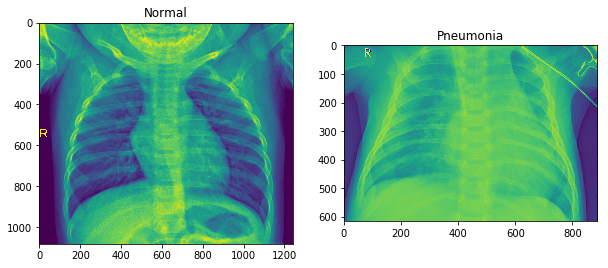

In [99]:
#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

In [100]:
# let's build the CNN model

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

In [101]:
#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())


In [102]:
# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

In [103]:
# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [105]:
 #Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [107]:
test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [109]:
validation_generator = test_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/chest_xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [111]:
test_set = test_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [112]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [113]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 163,
                         epochs = 10,
                         validation_data = validation_generator,
                         validation_steps = 624)

Epoch 1/10
163/163 [==============================] - 256s 2s/step - loss: 0.3665 - accuracy: 0.8443 - val_loss: 0.3269 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 225s 1s/step - loss: 0.2322 - accuracy: 0.9022 - val_loss: 0.6203 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 231s 1s/step - loss: 0.2155 - accuracy: 0.9109 - val_loss: 0.7217 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 230s 1s/step - loss: 0.1942 - accuracy: 0.9224 - val_loss: 0.3923 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 225s 1s/step - loss: 0.1767 - accuracy: 0.9319 - val_loss: 0.3448 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 232s 1s/step - loss: 0.1675 - accuracy: 0.9350 - val_loss: 0.3403 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 223s 1s/step - loss: 0.1578 - accuracy: 0.9388 - val_loss: 0.4749 - val_accuracy: 0.7500

In [114]:
test_accu = cnn.evaluate_generator(test_set,steps=624)
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 81.60435557365417 %


KeyError: 'val_acc'

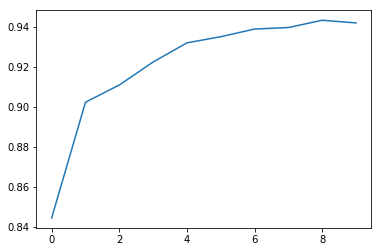

In [117]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

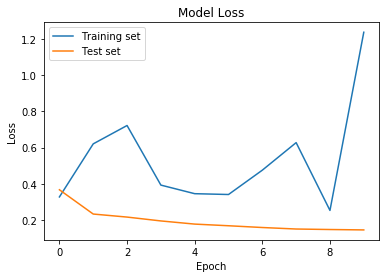

In [116]:
# Loss 

plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()